In [5]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data_entry = './CHESTXRAY/Data_Entry_2017.csv'
df = pd.read_csv(data_entry)
print(df.shape)
df.head()

(112120, 12)


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [7]:
# get counts of items under each entry (note: one entry may have multiple classes)
df['Finding Labels'].value_counts()

No Finding                                                                                              60361
Infiltration                                                                                             9547
Atelectasis                                                                                              4215
Effusion                                                                                                 3955
Nodule                                                                                                   2705
Pneumothorax                                                                                             2194
Mass                                                                                                     2139
Effusion|Infiltration                                                                                    1603
Atelectasis|Infiltration                                                                                 1350
Consolidat

### Get class names in data entry
 - __14 abnormal__: 'Infiltration', 'Atelectasis', 'Edema', 'Pneumothorax', 'Pneumonia', 'Effusion', 'Emphysema', 'Cardiomegaly', 'Fibrosis', 'Hernia', 'Consolidation', 'Nodule', 'Pleural_Thickening', 'Mass'
 - __1 normal__: 'No Finding'

In [8]:
# get names of classes
entries = df['Finding Labels'].value_counts().index.values.tolist()
classes = set()
for entry in entries:
    tokens = entry.split('|')
    for token in tokens:
        classes.add(token)
classes = list(classes)
print(classes)

['Atelectasis', 'Edema', 'Fibrosis', 'Consolidation', 'Cardiomegaly', 'Pleural_Thickening', 'Nodule', 'Mass', 'Pneumonia', 'Infiltration', 'No Finding', 'Hernia', 'Effusion', 'Pneumothorax', 'Emphysema']


### Select and split images into 2 different folders
 - __normal__: train/valid/test (0.8/0.1/0.1)
 - __abnormal__: train/valid/test (0.8/0.1/0.1)

In [14]:
# copy images
image_dir = './images'
normal_dir = './binary/normal'
abnormal_dir = './binary/abnormal'
os.makedirs(normal_dir, exist_ok=True)
os.makedirs(abnormal_dir, exist_ok=True)
for index, row in df.iterrows():
    image_index = row['Image Index']
    entry_labels = row['Finding Labels']
    if entry_labels == 'No Finding':
        shutil.copyfile(os.path.join(image_dir, image_index), os.path.join(normal_dir, image_index))
    else:
        shutil.copyfile(os.path.join(image_dir, image_index), os.path.join(abnormal_dir, image_index))

In [19]:
from random import sample
# split images into train/valid/test sub folders
def split(folder, valid_f=0.1, test_f=0.1):
    train = os.path.join(folder, 'train')
    valid = os.path.join(folder, 'valid')
    test = os.path.join(folder, 'test')
    os.makedirs(train, exist_ok=True)
    os.makedirs(valid, exist_ok=True)
    os.makedirs(test, exist_ok=True)
    number = len(os.listdir(folder))
    valid_list = sample(os.listdir(folder), int(number*valid_f))
    for f in valid_list:
        shutil.move(os.path.join(folder, f), valid)
    test_list = sample(os.listdir(folder), int(number*test_f))
    for f in test_list:
        shutil.move(os.path.join(folder, f), test)
    for f in os.listdir(folder):
        shutil.move(os.path.join(folder, f), train)

split(normal_dir)
split(abnormal_dir)

### Select and split images into 15 different folders
note: since one image may have multiple diagnoses, one image may appear in different folders

In [5]:
# get counts and image index of items under each class
class_sum = {key:[] for key in classes}
for index, row in df.iterrows():
    image_index = row['Image Index']
    entry_labels = row['Finding Labels']
    tokens = entry_labels.split('|')
    for token in tokens:
        class_sum[token].append(image_index)
print({key:len(class_sum[key]) for key in class_sum})

{'Infiltration': 19894, 'Atelectasis': 11559, 'Edema': 2303, 'Pneumothorax': 5302, 'Pneumonia': 1431, 'Effusion': 13317, 'Cardiomegaly': 2776, 'Hernia': 227, 'No Finding': 60361, 'Consolidation': 4667, 'Fibrosis': 1686, 'Nodule': 6331, 'Emphysema': 2516, 'Pleural_Thickening': 3385, 'Mass': 5782}


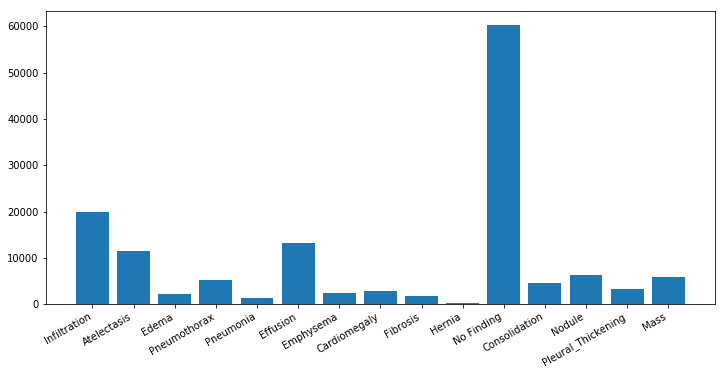

In [10]:
# plot class-count histogram
x = classes
y = [len(class_sum[key]) for key in classes]
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x, y)
fig.autofmt_xdate()
plt.show()